In [1]:
import pandas as pd

covid_data = pd.read_csv('C:\IDE\Skillfactory\PY-13 Visualisation\data\covid_19\\covid-19.csv', sep=',')
vaccinations_data = pd.read_csv('C:\IDE\Skillfactory\PY-13 Visualisation\data\covid_19\\country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df = covid_data.merge(
    vaccinations_data,
    on = ['date', 'country'],
    how = 'left'
)
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100

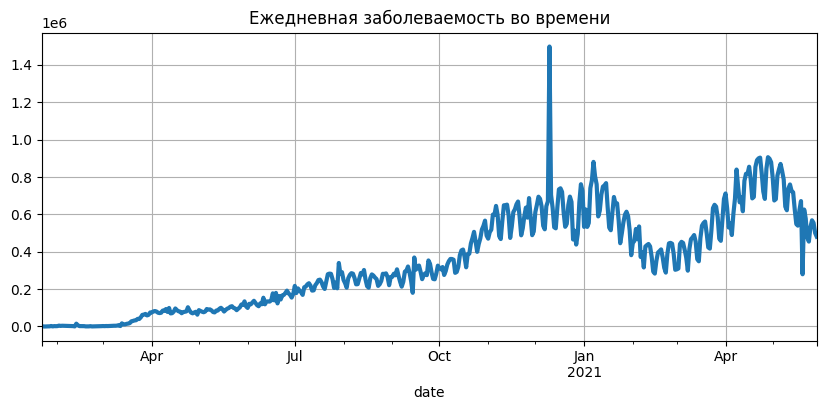

In [8]:
# Линейная диаграмма
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(10, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

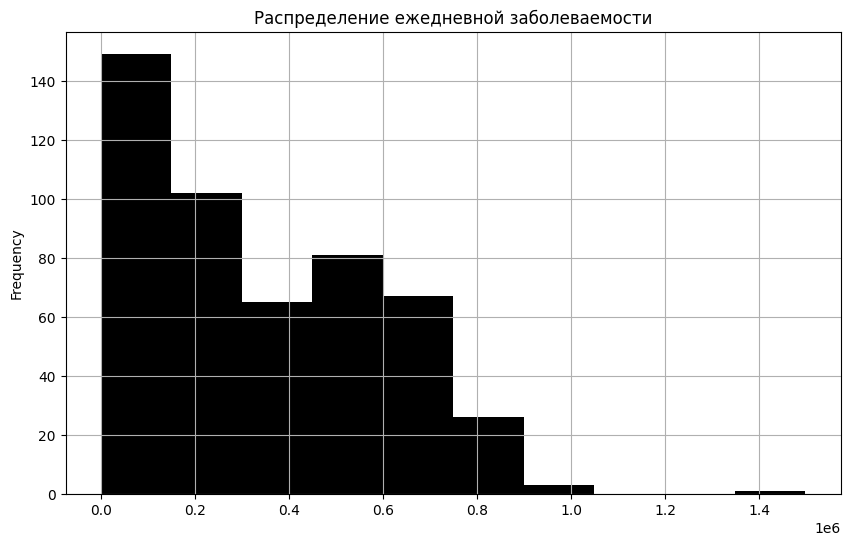

In [11]:
# Гистограмма
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

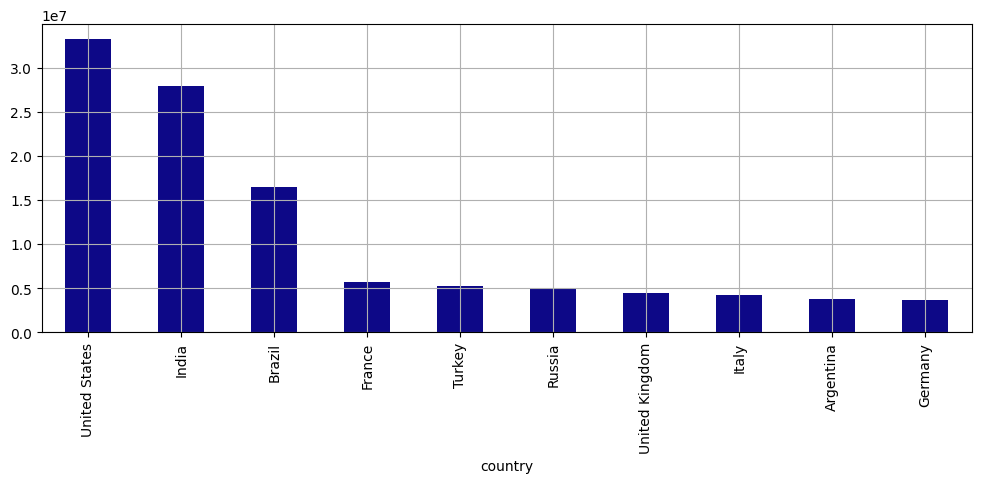

In [12]:
# Столбчатая диаграмма, которая покажет ТОП-10 стран по суммарной заболеваемости.
# Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель 
# с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

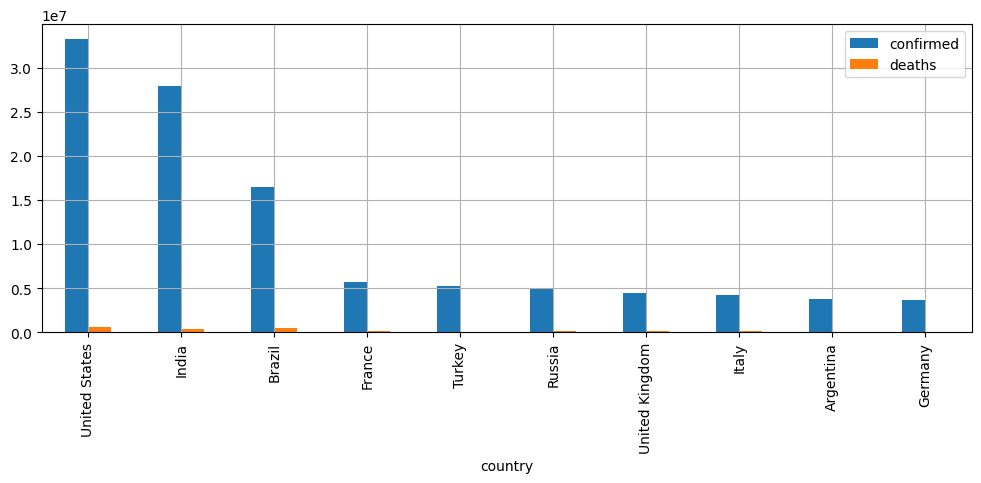

In [23]:
# А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. 
# Для этого отобразим сразу два показателя на столбчатой диаграмме: 

grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4) );

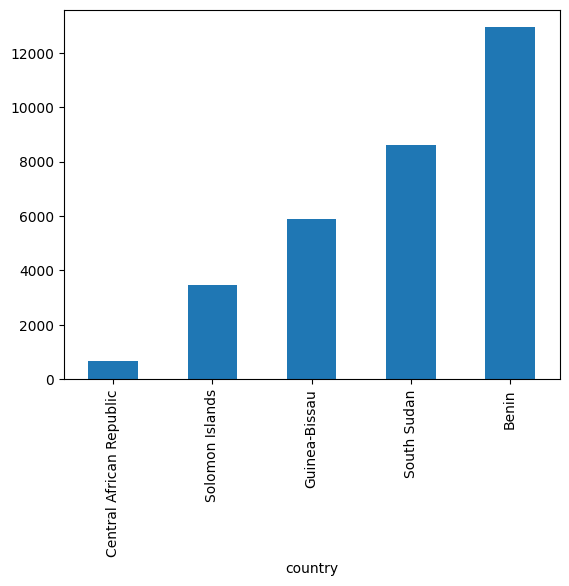

In [21]:

covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');